In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [3]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price INTEGER
)
""")
conn.commit()

In [4]:
data = [
    ('Apple', 5, 100),
    ('Banana', 10, 40),
    ('Apple', 3, 100),
    ('Mango', 4, 80),
    ('Banana', 6, 40)
]

cursor.executemany("INSERT INTO sales VALUES (?, ?, ?)", data)
conn.commit()

In [5]:
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

In [6]:
df = pd.read_sql_query(query, conn)


In [7]:
print(df)


  product  total_qty  revenue
0   Apple          8      800
1  Banana         16      640
2   Mango          4      320


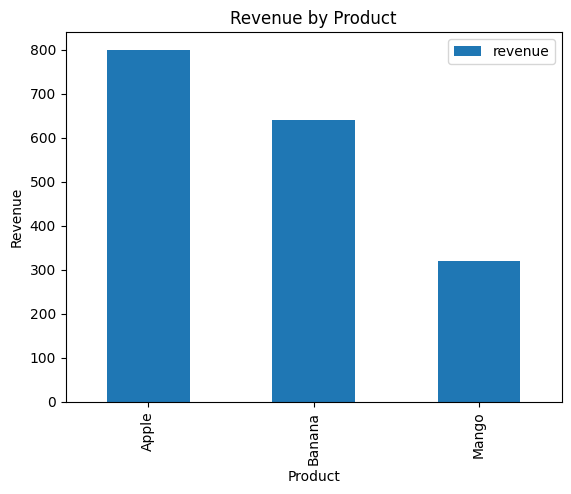

In [10]:
df.plot(kind='bar', x='product', y='revenue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.savefig("sales_chart.png")
plt.show()


In [9]:
plt.savefig("sales_chart.png")


<Figure size 640x480 with 0 Axes>